In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>



***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Fig 1: Relationship between CRIM and Price')

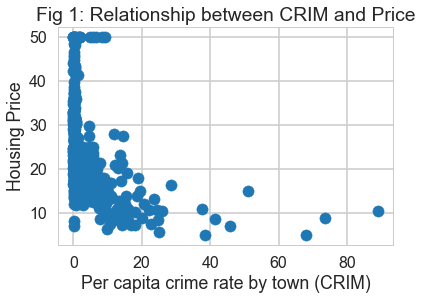

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Fig 1: Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

### Relationship
Based on the scatter plot, it shows that there is some type of negative correlation between house price and crime. 
Potentially showing a linear relationship. An interesting finding is that people's crime tolerance is centered around the interval 0-25 per capita crime rate by town. Another one is once capita crime rate is around 29, the housing prices stay within the 10-20 ($1000s) range.



Text(0.5, 1.0, 'Fig 2: Relationship between RM and Price')

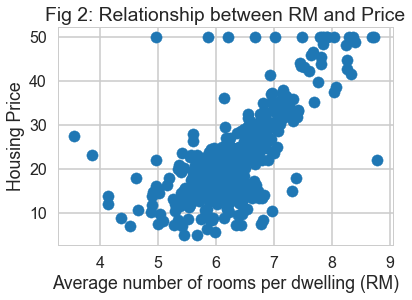

In [13]:
# Scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Fig 2: Relationship between RM and Price")

Text(0.5, 1.0, 'Fig 3: Relationship between PTRATIO and Price')

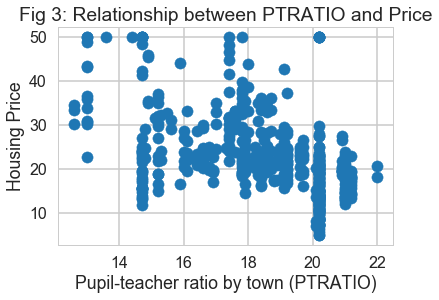

In [14]:
# Scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Fig 3: Relationship between PTRATIO and Price")


Text(0.5, 1.0, 'Fig 4: Relationship between NOX and Price')

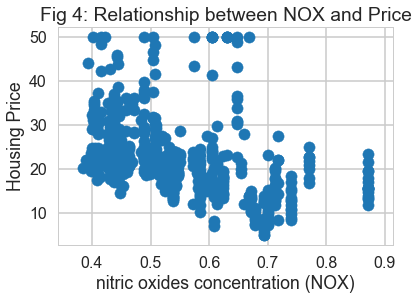

In [15]:
# Scatter plot between *NOX* and *PRICE*
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("nitric oxides concentration (NOX)")
plt.ylabel("Housing Price")
plt.title("Fig 4: Relationship between NOX and Price")

Text(0.5, 1.0, 'Fig 5: Relationship between DIS and Price')

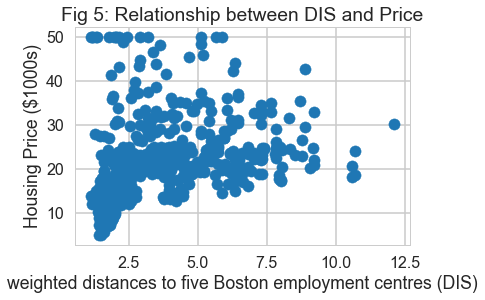

In [16]:
# Scatter plot between *DIS* and *PRICE*
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("weighted distances to five Boston employment centres (DIS)")
plt.ylabel("Housing Price ($1000s)")
plt.title("Fig 5: Relationship between DIS and Price")

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

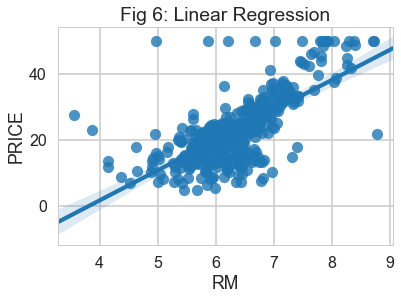

In [17]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
_=plt.title('Fig 6: Linear Regression')

### Histograms
***


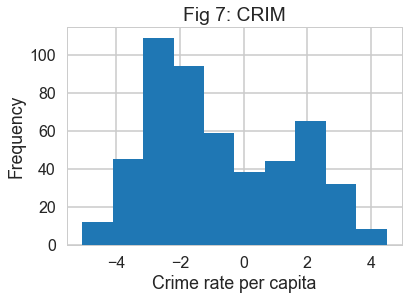

In [18]:
plt.hist(np.log(bos.CRIM))
plt.title("Fig 7: CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

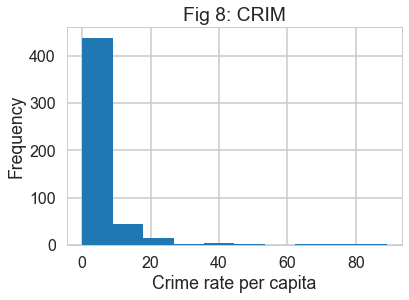

In [19]:
plt.hist(bos.CRIM)
plt.title("Fig 8: CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

Taking the log on the CRIM variable was to improve its linear regression potential. Notice that with the log version you can see that negative values that could indicate that negative correlation.This was not going be obvios by just looking into its non-log histogram like the one above. 

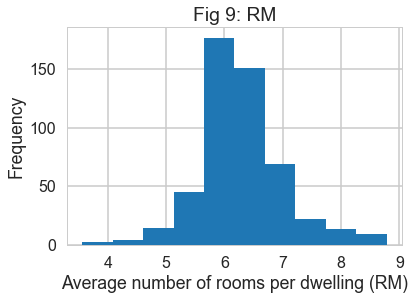

In [20]:
plt.hist(bos.RM)
plt.title("Fig 9: RM")
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Frequency")
plt.show()

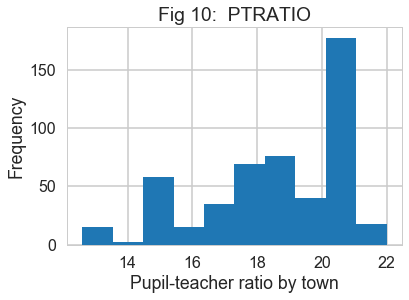

In [21]:
plt.hist(bos.PTRATIO)
plt.title("Fig 10:  PTRATIO")
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Frequency")
plt.show()

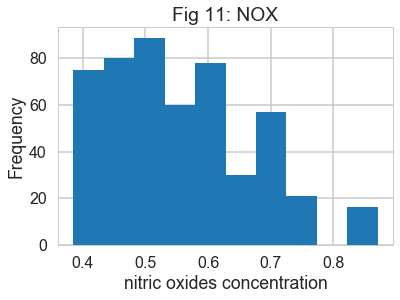

In [23]:
plt.hist(bos.NOX)
plt.title("Fig 11: NOX")
plt.xlabel("nitric oxides concentration")
plt.ylabel("Frequency")
plt.show()

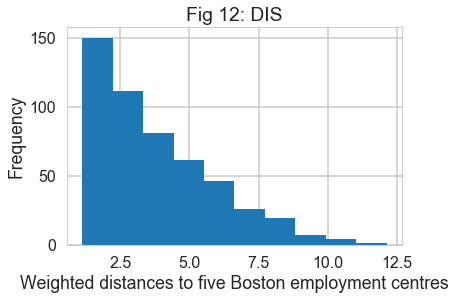

In [24]:
plt.hist(bos.DIS)
plt.title("Fig 12: DIS")
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Frequency")
plt.show()

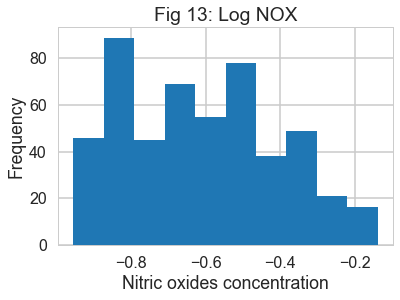

In [25]:
plt.hist(np.log(bos.NOX))
plt.title("Fig 13: Log NOX")
plt.xlabel("Nitric oxides concentration")
plt.ylabel("Frequency")
plt.show()

Taking the log on the NOX variable, it makes the existenace of a linear regression and a negative correlation more noticeable. 

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [26]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           2.49e-74
Time:                        18:26:59   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0.5, 1.0, 'Fig 14: Prices vs Predicted Prices($\\hat{Y}_i$)')

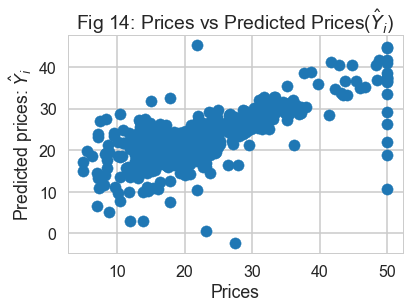

In [28]:
plt.scatter(bos['PRICE'], m.fittedvalues)
plt.xlabel("Prices")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Fig 14: Prices vs Predicted Prices($\hat{Y}_i$)")

The plot shows a positive relationship and that the model captured succesfully the hidden relationship. Something interesting to call out is the predicted prices for the actual value of 50 are contained within a 10 to 50 range.  Another observation is the 2 predicted values that are equal to zero and less than zero correspondingly for the actual values between 20 and 30.

### Fitting Linear Regression using `sklearn`


In [29]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [30]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


Before making any recommendation, is important to understand the outputs, particularly the resulting coefficient for each predictor values. For example, a positive coefficient will tell that adding an extra room is associated with an increate in the house price. Given the dataset, it makes practical sense. If I want to go ahead and remove the intercept, then I nee to my model includes constants. 

To be able to make valid inferences from the regression, indeed the residuals the linear regression model give us a good fit. Given the assumpions of the linear model, indeed the residuals should follow a normal distribution.

False. Y does not need to be normally distributed. Y needs to be continuous, unbounded, and measured on an interval or ratio scale.


In [31]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280363404


In [32]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [33]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [34]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

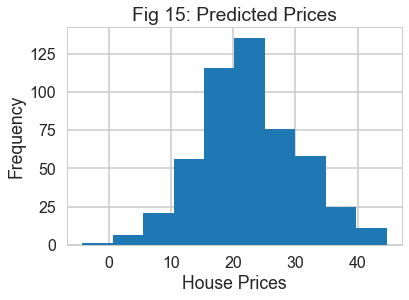

In [36]:
# Histogram
plt.hist(lm.predict(X))
plt.title("Fig 15: Predicted Prices")
plt.xlabel("House Prices")
plt.ylabel("Frequency")
plt.show()


The predicted prices follow a Normal Distribution, spread from less than than zero more than 40. The most frequent prices are cluster within the 15-30 range. Potential outliers candidates will the ones that have values less than zero.

Text(0.5, 1.0, 'Fig 16: Prices vs Predicted Prices')

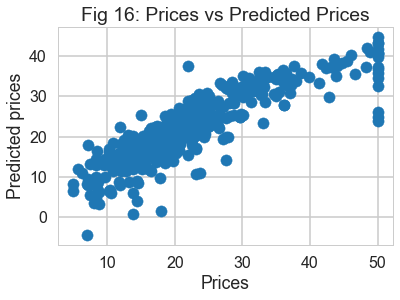

In [37]:
#Scatter plot
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Fig 16: Prices vs Predicted Prices")

The review of the resulting plots from using Skicit and Statsmodels shows that both models did a good job in predicting the prices. The main advantage from Skicit-learn is that it has a wide library of algorithmss that are easy to use as long as the data is organized and gives you enough results (outputs)to make an educated guess on how good your model is. On the other side, Statsmodels gives you more results for further analysis to ensure you understand the relevant variables and impact. The main advantage of Statsmodel is that offers statistics and econometric tools that are comparable or almost equal to other statistics software like R. 

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [38]:
# Residual Sum-of-Squares
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149873


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [39]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

8.375526819526184e-23


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [40]:
lm1 = LinearRegression()
lm1.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
#Intercept
print('Estimated intercept coefficient: {}'.format(lm1.intercept_))

Estimated intercept coefficient: 62.34462747483265


In [42]:
#Coefficients
print('Estimated coefficient: {}'.format(lm1.coef_))

Estimated coefficient: [-2.1571753]


In [43]:
import sklearn.metrics as skl

In [44]:
r = skl.r2_score(bos.PRICE, lm1.predict(X[['PTRATIO']]), sample_weight=None)
print('Calculated R^2: {}'.format(r))

Calculated R^2: 0.257847318009223


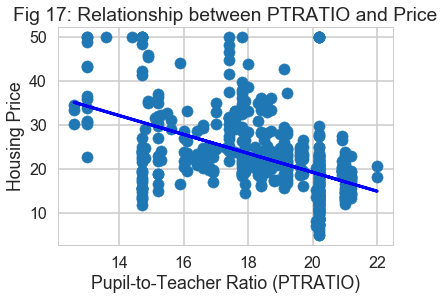

In [45]:
#Plot with Fitted line
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Fig 17: Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm1.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [46]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
bos3_df = bos[['CRIM', 'RM','PTRATIO']]
bos3_df.head()


,CRIM,RM,PTRATIO
0,0.00632,6.575,15.3
1,0.02731,6.421,17.8
2,0.02729,7.185,17.8
3,0.03237,6.998,18.7
4,0.06905,7.147,18.7


In [48]:
lm2 = LinearRegression()
lm2.fit(bos3_df, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
r1 = skl.r2_score(bos.PRICE, lm2.predict(bos3_df), sample_weight=None)
print('Calculated R^2: {}'.format(r))

Calculated R^2: 0.257847318009223


In [50]:
params = np.append(lm2.intercept_,lm2.coef_)
predictions = lm2.predict(bos3_df)

newX = pd.DataFrame({"Constant":np.ones(len(bos3_df))}).join(pd.DataFrame(bos3_df))
MSE = (sum((bos.PRICE-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilites
0       -3.3066            4.038    -0.819         0.413
1       -0.2021            0.032    -6.301         0.000
2        7.3816            0.402    18.360         0.000
3       -1.0742            0.133    -8.081         0.000


Since p values are equal to zero for Crime (1), Room(2) and Pupil/Teacher Ratio (3), they are a statistical significant predictor of PRICE. The main predictor that increases the price value will be the addition of rooms in a house while the other variables will decrease the price of the house. The intercept (0) is the average of the prices given that all of the predictor variables are 0.


In [51]:
mo2 = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
mo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           1.09e-97
Time:                        18:32:23   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.413     -11.240       4.627
CRIM          -0.2021      0.032     -6.301      0.000      -0.265      -0.139
RM             7.3816      0.402     18.360      0.000       6.592       8.171
PTRATIO       -1.0742      0.133     -8.081      0.000      -1.335      -0.813
==============================================================================
Omnibus:                      233.249   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.374
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      12.054   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [52]:
mo1 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + AGE', bos).fit()
mo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     163.1
Date:                Sun, 30 Dec 2018   Prob (F-statistic):          1.36e-102
Time:                        18:32:30   Log-Likelihood:                -1595.5
No. Observations:                 506   AIC:                             3203.
Df Residuals:                     500   BIC:                             3228.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1420      4.206      1.222      0.222      -3.122      13.406
CRIM          -0.1858      0.033     -5.645      0.000      -0.250      -0.121
RM             7.1700      0.393     18.249      0.000       6.398       7.942
PTRATIO       -1.0079      0.130     -7.758      0.000      -1.263      -0.753
DIS           -0.7414      0.185     -4.015      0.000      -1.104      -0.379
AGE           -0.0815      0.014     -5.904      0.000      -0.109      -0.054
==============================================================================
Omnibus:                      267.382   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2785.310
Skew:                           2.073   Prob(JB):                         0.00
Kurtosis:                      13.720   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

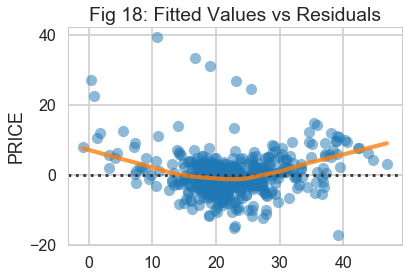

In [54]:
# Fitted values versus residuals 
sns.residplot(mo2.fittedvalues, 'PRICE', 
              data=bos, 
              lowess=True, 
              scatter_kws={'color': 'C0', 'alpha': 0.5},
              line_kws={'color': 'C1', 'alpha': 0.8});
_= plt.title('Fig 18: Fitted Values vs Residuals')

The graph shows that the linear regression model is actually a good indicator on the predicted prices given the direction of the residual line.

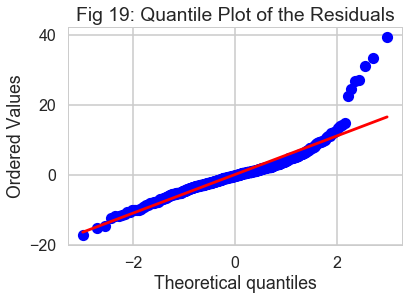

In [55]:
import pylab
# Quantile plot of residuals
stats.probplot(mo2.resid, plot=pylab)
_ = plt.title('Fig 19: Quantile Plot of the Residuals');

The QQ plot shows that the residuals are normally distributed with some outliers towards the upper right corner.

Comparing both plots, the advantage of the QQ plot is that confirms that the residuals are normally ditributed but the Fitted value plot gives a better view of the big picture.

In [56]:
# Identify the residuals outliers
bos['FITTED'] = mo2.fittedvalues
bos['RESIDUALS'] = mo2.resid

large_residuals = bos[bos.RESIDUALS > 20]
print(large_residuals)
print(len(large_residuals))

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
365   4.55587  0.0   18.1   0.0  0.718  3.561   87.9  1.6132  24.0  666.0   
367  13.52220  0.0   18.1   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
368   4.89822  0.0   18.1   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
369   5.66998  0.0   18.1   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
370   6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024  24.0  666.0   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296  24.0  666.0   

     PTRATIO       B  LSTAT  PRICE     FITTED  RESIDUALS  
365     20.2  354.70   7.12   27.5   0.359783  27.140217  
367     20.2  131.42  13.33   23.1   0.776834  22.323166  
368     20.2  375.52   3.26   50.0  10.691218  39.308782  
369     20.2  375.33   3.73   50.0  23.179862  26.820138  
370     20.2  392.05   2.96   50.0  25.462335  24.537665  
371     20.2  366.15   9.53  

Given that an outlier is an observation with large residual, is given an indication that I should a deeper analysis to find out why it happened. 


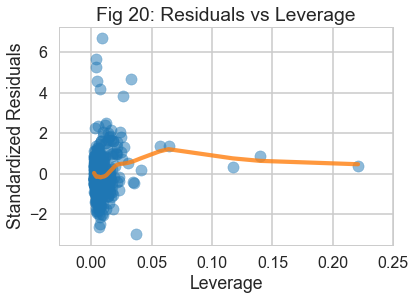

In [57]:
# Normalized residuals
mnorm_resid = mo2.get_influence().resid_studentized_internal

# Use Leverage, from statsmodels internals
model_leverage = mo2.get_influence().hat_matrix_diag

plt.scatter(model_leverage, mnorm_resid, alpha=0.5)
sns.regplot(model_leverage, mnorm_resid, scatter=False, ci=False, lowess=True, line_kws={'color': 'C1', 'alpha': 0.8})

_ = plt.title('Fig 20: Residuals vs Leverage')
_ = plt.xlabel('Leverage')
_ = plt.ylabel('Standardized Residuals')

From the plot, it can be observed that there are some predictor variables with extreme values that are causing the leverage values to move beyond .05 while mantaining a residual range beteen 0 and 2. 

In [58]:
oso = mo2.outlier_test()
print(oso)
print(type(oso))

     student_resid   unadj_p  bonf(p)
0        -0.816770  0.414448      1.0
1        -0.572286  0.567385      1.0
2         0.697897  0.485566      1.0
3         0.876456  0.381202      1.0
4         1.168710  0.243076      1.0
5         0.788951  0.430514      1.0
6        -0.311453  0.755586      1.0
7         0.205351  0.837381      1.0
8        -0.921249  0.357364      1.0
9        -0.981740  0.326702      1.0
10       -2.121460  0.034373      1.0
11       -0.989857  0.322722      1.0
12       -0.361244  0.718069      1.0
13        0.422314  0.672977      1.0
14       -0.137043  0.891052      1.0
15        0.481737  0.630203      1.0
16        0.915051  0.360605      1.0
17       -0.117962  0.906145      1.0
18        1.015825  0.310203      1.0
19        0.330042  0.741507      1.0
20       -0.238202  0.811822      1.0
21        0.273514  0.784571      1.0
22       -0.685669  0.493239      1.0
23       -0.399471  0.689716      1.0
24       -0.359829  0.719127      1.0
25       -0.

In [59]:
lg = oso.nlargest(7, 'student_resid')
outliers = list(lg.index)

# pick top 5 leverage points
model_cooks = mo2.get_influence().cooks_distance[0]

leverage_top_5 = list(np.flip(np.argsort(model_cooks), 0)[:5])

to_remove = set(outliers  + leverage_top_5)
to_remove = list(to_remove)

bos2 = bos.drop(bos.index[to_remove])

bos.count()-bos2.count()

CRIM         8
ZN           8
INDUS        8
CHAS         8
NOX          8
RM           8
AGE          8
DIS          8
RAD          8
TAX          8
PTRATIO      8
B            8
LSTAT        8
PRICE        8
FITTED       8
RESIDUALS    8
dtype: int64

In [60]:
print(outliers)
print(leverage_top_5)

[368, 372, 371, 365, 369, 370, 367]
[365, 368, 367, 364, 370]


In [61]:
mo3 = ols('PRICE ~ CRIM + RM + PTRATIO', bos2).fit()
print('Summary of full model\n{}\n'.format(mo2.summary()))

print('Summary of reduced model\n{}\n'.format(mo3.summary()))

Summary of full model
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           1.09e-97
Time:                        18:41:33   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.0